#### Parte 2 - EP2

#### EP2 MAC0417 / MAC5768

#### Nome: Celestino Paulo Tchipongue Kalueyo

#### NUSP:11873374

#### Turma: MAC0417 / MAC5768

In [2]:
import pandas as pd

In [3]:
metadado = pd.read_csv("./metadados.csv")

In [4]:
metadado

Objectos Nome_imagem     1ªclasse        2ªclasse    3ªclasse  \
0    Rp, Re, O, E    001.jpeg    Repelente         Relógio      Óculos   
1    E, Re, O, Rp    002.jpeg       Escova         Relógio      Óculos   
2    O, Rp, E, Re    003.jpeg       Óculos       Repelente      Escova   
3    Re, Rp, E, O    004.jpeg      Relógio       Repelente      Escova   
4     T, G, C, Cl    005.jpeg   Termómetro      Grampiador      Caneta   
..            ...         ...          ...             ...         ...   
195  Cl, C, Re, G    196.jpeg  Calculadora          Caneta     Relógio   
196  G, C, Re, Cl    197.jpeg   Grampiador          Caneta     Relógio   
197  G, C, Re, Cl    198.jpeg   Grampiador          Caneta     Relógio   
198  Re, Ch, G, C    199.jpeg      Relógio  Chave de fenda  Grampiador   
199  C, Cl, G, Re    200.jpeg       Caneta     Calculadora  Grampiador   

        4ªclasse Plano de fundo     Luz  
0         Escova           Taco  Escuro  
1      Repelente           Taco  Quente  
2        Relógio           Taco  Neutra  
3         Óculos           Taco  Escuro  
4    Calculadora           Taco  Escuro  
..           ...            ...     ...  
195   Grampiador        Madeira  Quente  
196  Calculadora        Madeira  Neutra  
197  Calculadora        Madeira   Claro  
198       Caneta        Madeira   Claro  
199      Relógio        Madeira  Escuro  

[200 rows x 8 columns]

In [5]:
#Função de contagem da quantidade de imagens por categoria (Luz)
def count_images_per_light(df):
  
  light_counts = {}
  for light in df["Luz"].unique():
    light_counts[light] = len(df[df["Luz"] == light])
  return light_counts

images_per_light = count_images_per_light(metadado)
#print(images_per_light)
escuro = metadado[metadado['Luz'] == 'Escuro']['Nome_imagem']
quente = metadado[metadado['Luz'] == 'Quente']['Nome_imagem']
neutra = metadado[metadado['Luz'] == 'Neutra']['Nome_imagem']
claro = metadado[metadado['Luz'] == 'Claro']['Nome_imagem']
print('Número por iluminação')
print(images_per_light)
print('*********************************************************')
print('*********************************************************')
print(f'Escuro: {escuro.to_list()}')
print(f'Quente: {quente.to_list()}')
print(f'Neutra: {neutra.to_list()}')
print(f'Claro: {claro.to_list()}')

Número por iluminação
{'Escuro': 55, 'Quente': 50, 'Neutra': 47, 'Claro': 48}
*********************************************************
*********************************************************
Escuro: ['001.jpeg', '004.jpeg', '005.jpeg', '009.jpeg', '010.jpeg', '011.jpeg', '017.jpeg', '024.jpeg', '029.jpeg', '034.jpeg', '038.jpeg', '040.jpeg', '044.jpeg', '045.jpeg', '051.jpeg', '053.jpeg', '054.jpeg', '068.jpeg', '074.jpeg', '079.jpeg', '083.jpeg', '088.jpeg', '093.jpeg', '097.jpeg', '099.jpeg', '100.jpeg', '102.jpeg', '103.jpeg', '106.jpeg', '107.jpeg', '112.jpeg', '113.jpeg', '117.jpeg', '118.jpeg', '123.jpeg', '124.jpeg', '125.jpeg', '128.jpeg', '134.jpeg', '138.jpeg', '149.jpeg', '150.jpeg', '154.jpeg', '157.jpeg', '161.jpeg', '167.jpeg', '173.jpeg', '174.jpeg', '175.jpeg', '182.jpeg', '188.jpeg', '189.jpeg', '190.jpeg', '193.jpeg', '200.jpeg']
Quente: ['002.jpeg', '008.jpeg', '014.jpeg', '018.jpeg', '030.jpeg', '031.jpeg', '035.jpeg', '036.jpeg', '048.jpeg', '049.jpeg', '055.jpe

In [6]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# originalGrayDataset (normalization)

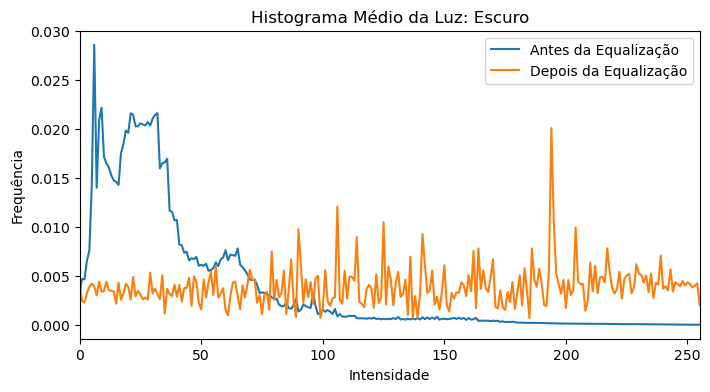

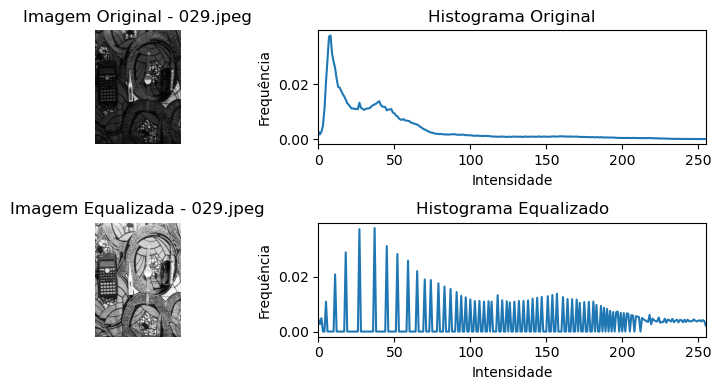

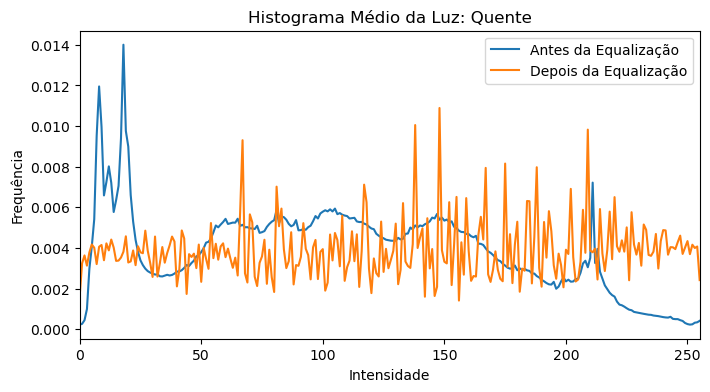

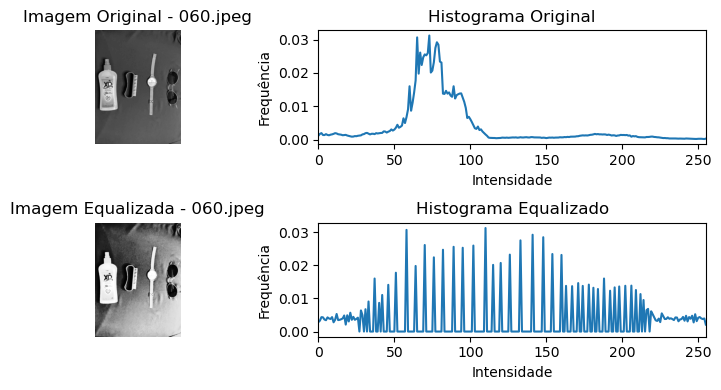

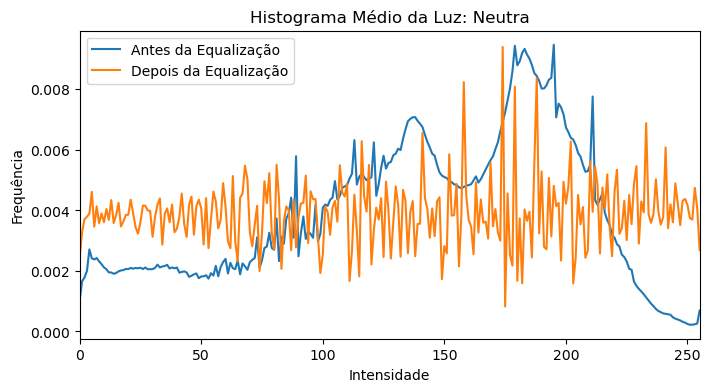

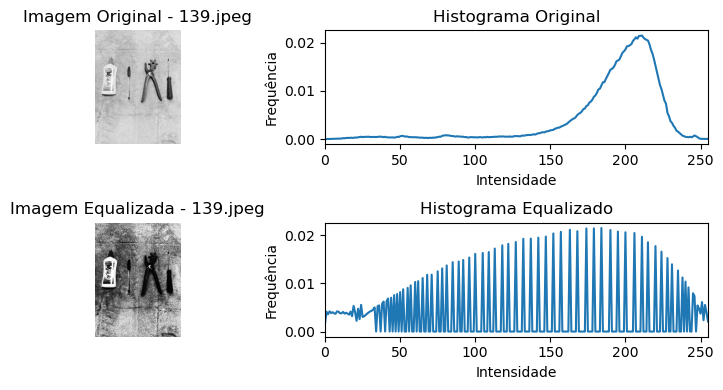

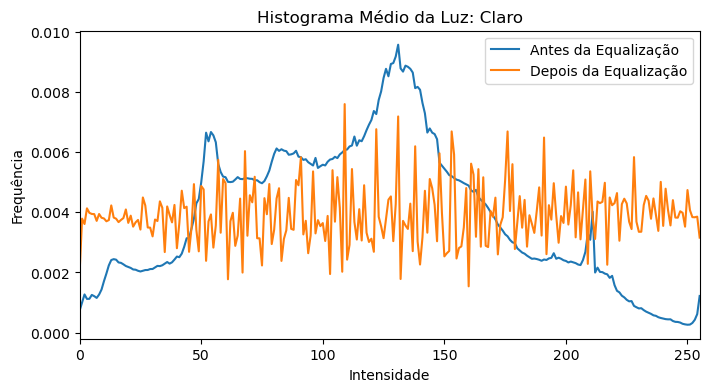

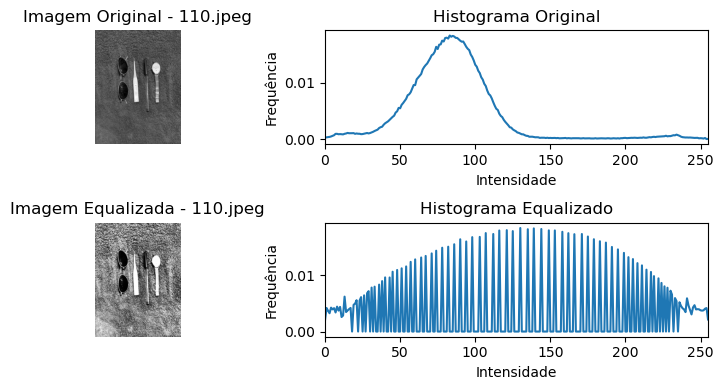

In [36]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

# Caminho para o diretório das imagens em escala de cinza
path = "./originalGrayDataset"

# Listas de imagens por iluminação
luz = {
    "Escuro": ['001.jpeg', '004.jpeg', '005.jpeg', '009.jpeg', '010.jpeg', '011.jpeg', '017.jpeg', '024.jpeg', '029.jpeg', '034.jpeg', '038.jpeg', '040.jpeg', '044.jpeg', '045.jpeg', '051.jpeg', '053.jpeg', '054.jpeg', '068.jpeg', '074.jpeg', '079.jpeg', '083.jpeg', '088.jpeg', '093.jpeg', '097.jpeg', '099.jpeg', '100.jpeg', '102.jpeg', '103.jpeg', '106.jpeg', '107.jpeg', '112.jpeg', '113.jpeg', '117.jpeg', '118.jpeg', '123.jpeg', '124.jpeg', '125.jpeg', '128.jpeg', '134.jpeg', '138.jpeg', '149.jpeg', '150.jpeg', '154.jpeg', '157.jpeg', '161.jpeg', '167.jpeg', '173.jpeg', '174.jpeg', '175.jpeg', '182.jpeg', '188.jpeg', '189.jpeg', '190.jpeg', '193.jpeg', '200.jpeg'],
    "Quente": ['002.jpeg', '008.jpeg', '014.jpeg', '018.jpeg', '030.jpeg', '031.jpeg', '035.jpeg', '036.jpeg', '048.jpeg', '049.jpeg', '055.jpeg', '057.jpeg', '058.jpeg', '059.jpeg', '060.jpeg', '064.jpeg', '065.jpeg', '071.jpeg', '077.jpeg', '078.jpeg', '084.jpeg', '089.jpeg', '090.jpeg', '101.jpeg', '104.jpeg', '109.jpeg', '111.jpeg', '114.jpeg', '116.jpeg', '120.jpeg', '129.jpeg', '131.jpeg', '133.jpeg', '135.jpeg', '137.jpeg', '141.jpeg', '144.jpeg', '148.jpeg', '153.jpeg', '158.jpeg', '160.jpeg', '164.jpeg', '165.jpeg', '177.jpeg', '179.jpeg', '184.jpeg', '185.jpeg', '194.jpeg', '195.jpeg', '196.jpeg'],
    "Neutra": ['003.jpeg', '013.jpeg', '015.jpeg', '016.jpeg', '022.jpeg', '023.jpeg', '026.jpeg', '028.jpeg', '032.jpeg', '033.jpeg', '041.jpeg', '042.jpeg', '043.jpeg', '047.jpeg', '050.jpeg', '056.jpeg', '061.jpeg', '062.jpeg', '063.jpeg', '066.jpeg', '069.jpeg', '072.jpeg', '073.jpeg', '075.jpeg', '076.jpeg', '081.jpeg', '085.jpeg', '086.jpeg', '091.jpeg', '092.jpeg', '095.jpeg', '096.jpeg', '115.jpeg', '119.jpeg', '122.jpeg', '127.jpeg', '130.jpeg', '132.jpeg', '136.jpeg', '139.jpeg', '143.jpeg', '147.jpeg', '151.jpeg', '156.jpeg', '166.jpeg', '192.jpeg', '197.jpeg'],
    "Claro": ['006.jpeg', '007.jpeg', '012.jpeg', '019.jpeg', '020.jpeg', '021.jpeg', '025.jpeg', '027.jpeg', '037.jpeg', '039.jpeg', '046.jpeg', '052.jpeg', '067.jpeg', '070.jpeg', '080.jpeg', '082.jpeg', '087.jpeg', '094.jpeg', '098.jpeg', '105.jpeg', '108.jpeg', '110.jpeg', '121.jpeg', '126.jpeg', '140.jpeg', '142.jpeg', '145.jpeg', '146.jpeg', '152.jpeg', '155.jpeg', '159.jpeg', '162.jpeg', '163.jpeg', '168.jpeg', '169.jpeg', '170.jpeg', '171.jpeg', '172.jpeg', '176.jpeg', '178.jpeg', '180.jpeg', '181.jpeg', '183.jpeg', '186.jpeg', '187.jpeg', '191.jpeg', '198.jpeg', '199.jpeg']
}

def calculate_average_histogram(image_paths, path, equalize=False):
    # Inicializa o histograma médio
    average_histogram = np.zeros(256)

    for image_name in image_paths:
        # Carrega a imagem
        image = cv2.imread(os.path.join(path, image_name), cv2.IMREAD_GRAYSCALE)
        if image is None:
            print(f"Erro ao carregar a imagem: {image_name}")
            continue
        
        if equalize:
            # Aplica equalização de histograma
            image = cv2.equalizeHist(image)
        
        # Calcula o histograma da imagem
        hist = cv2.calcHist([image], [0], None, [256], [0, 256])
        hist = hist / hist.sum()  # Normaliza o histograma
        average_histogram += hist.flatten()

    # Divide pelo número de imagens para obter a média
    average_histogram /= len(image_paths)
    return average_histogram

def plot_histograms_and_images(luz_name, image_name, image, image_eq, hist_orig, hist_eq):
    # Plota as imagens e os histogramas
    plt.figure(figsize=(8, 4))
    
    # Imagem original
    plt.subplot(2, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title(f'Imagem Original - {image_name}')
    plt.axis('off')

    # Histograma da imagem original
    plt.subplot(2, 2, 2)
    plt.plot(hist_orig)
    plt.title('Histograma Original')
    plt.xlabel('Intensidade')
    plt.ylabel('Frequência')
    plt.xlim([0, 255])
    
    # Imagem equalizada
    plt.subplot(2, 2, 3)
    plt.imshow(image_eq, cmap='gray')
    plt.title(f'Imagem Equalizada - {image_name}')
    plt.axis('off')

    # Histograma da imagem equalizada
    plt.subplot(2, 2, 4)
    plt.plot(hist_eq)
    plt.title('Histograma Equalizado')
    plt.xlabel('Intensidade')
    plt.ylabel('Frequência')
    plt.xlim([0, 255])
    
    plt.tight_layout()
    plt.show()

def plot_luz_histograms_and_images():
    for luz_name, image_list in luz.items():
        # Calcula o histograma médio para as imagens da luz antes da equalização
        avg_hist_before = calculate_average_histogram(image_list, path, equalize=False)
        
        # Calcula o histograma médio para as imagens da luz após a equalização
        avg_hist_after = calculate_average_histogram(image_list, path, equalize=True)
        
        # Plota os histogramas médios antes e depois da equalização
        plt.figure(figsize=(8, 4))
        plt.plot(avg_hist_before, label='Antes da Equalização')
        plt.plot(avg_hist_after, label='Depois da Equalização')
        plt.title(f'Histograma Médio da Luz: {luz_name}')
        plt.xlabel('Intensidade')
        plt.ylabel('Frequência')
        plt.legend()
        plt.xlim([0, 255])
        plt.show()
        
        # Seleciona uma imagem aleatória da luz
        random_image = random.choice(image_list)
        
        # Carrega a imagem
        image_path = os.path.join(path, random_image)
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if image is None:
            print(f"Erro ao carregar a imagem: {random_image}")
            continue

        # Aplica equalização de histograma
        image_eq = cv2.equalizeHist(image)

        # Calcula os histogramas
        hist_orig = cv2.calcHist([image], [0], None, [256], [0, 256]).flatten()
        hist_eq = cv2.calcHist([image_eq], [0], None, [256], [0, 256]).flatten()

        # Normaliza os histogramas
        hist_orig = hist_orig / hist_orig.sum()
        hist_eq = hist_eq / hist_eq.sum()

        # Plota a imagem original e a imagem equalizada com seus respectivos histogramas
        plot_histograms_and_images(luz_name, random_image, image, image_eq, hist_orig, hist_eq)

# Plota o histograma médio das imagens para cada luz e imagens antes e depois da equalização
plot_luz_histograms_and_images()

# Average filter (normalization)

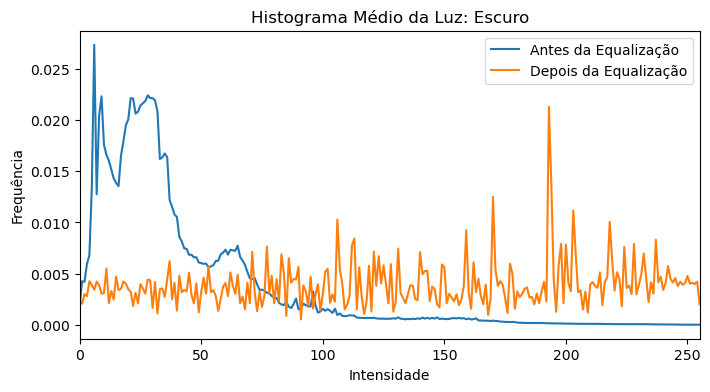

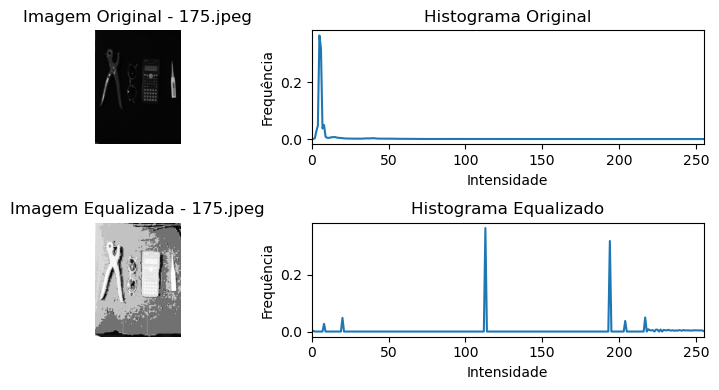

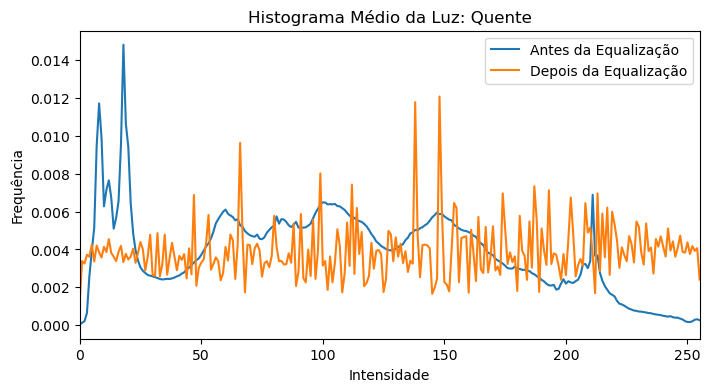

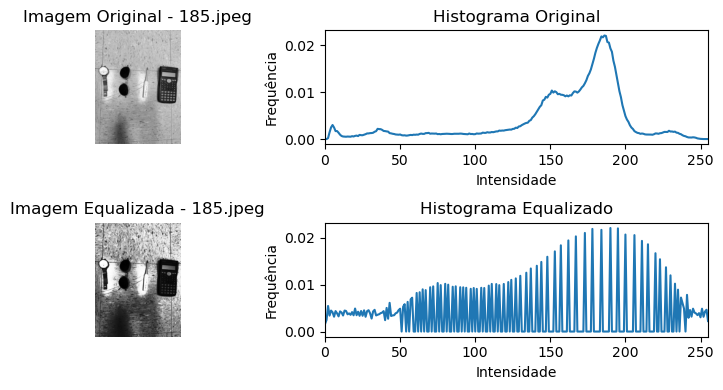

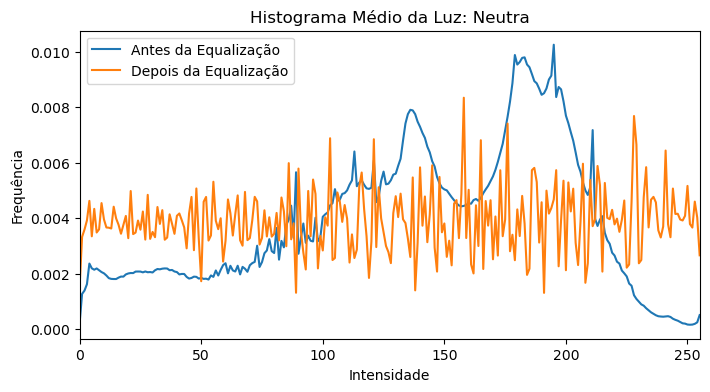

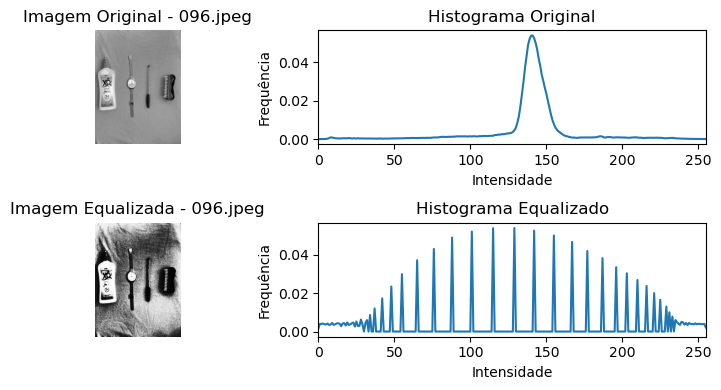

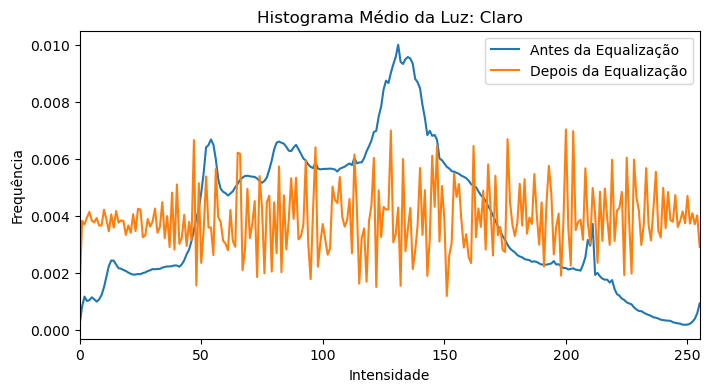

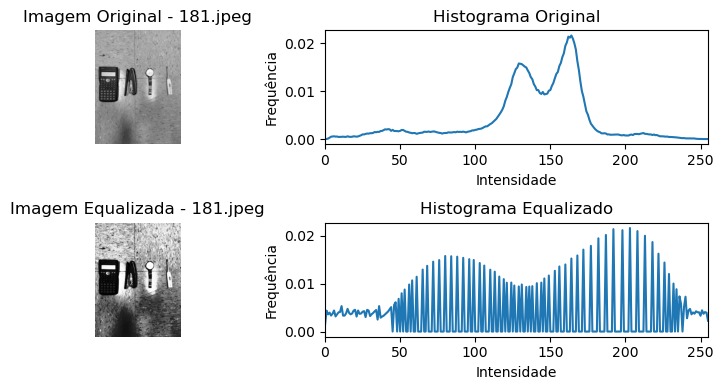

In [37]:
# Caminho para o diretório das imagens em escala de cinza
path = "./augmentedDataset/Filtro_da_media"

# Listas de imagens por iluminação
"""luz = {
    "Escuro": ['001.jpeg', '004.jpeg', '005.jpeg', '009.jpeg', '010.jpeg', '011.jpeg', '017.jpeg', '024.jpeg', '029.jpeg', '034.jpeg', '038.jpeg', '040.jpeg', '044.jpeg', '045.jpeg', '051.jpeg', '053.jpeg', '054.jpeg', '068.jpeg', '074.jpeg', '079.jpeg', '083.jpeg', '088.jpeg', '093.jpeg', '097.jpeg', '099.jpeg', '100.jpeg', '102.jpeg', '103.jpeg', '106.jpeg', '107.jpeg', '112.jpeg', '113.jpeg', '117.jpeg', '118.jpeg', '123.jpeg', '124.jpeg', '125.jpeg', '128.jpeg', '134.jpeg', '138.jpeg', '149.jpeg', '150.jpeg', '154.jpeg', '157.jpeg', '161.jpeg', '167.jpeg', '173.jpeg', '174.jpeg', '175.jpeg', '182.jpeg', '188.jpeg', '189.jpeg', '190.jpeg', '193.jpeg', '200.jpeg'],
    "Quente": ['002.jpeg', '008.jpeg', '014.jpeg', '018.jpeg', '030.jpeg', '031.jpeg', '035.jpeg', '036.jpeg', '048.jpeg', '049.jpeg', '055.jpeg', '057.jpeg', '058.jpeg', '059.jpeg', '060.jpeg', '064.jpeg', '065.jpeg', '071.jpeg', '077.jpeg', '078.jpeg', '084.jpeg', '089.jpeg', '090.jpeg', '101.jpeg', '104.jpeg', '109.jpeg', '111.jpeg', '114.jpeg', '116.jpeg', '120.jpeg', '129.jpeg', '131.jpeg', '133.jpeg', '135.jpeg', '137.jpeg', '141.jpeg', '144.jpeg', '148.jpeg', '153.jpeg', '158.jpeg', '160.jpeg', '164.jpeg', '165.jpeg', '177.jpeg', '179.jpeg', '184.jpeg', '185.jpeg', '194.jpeg', '195.jpeg', '196.jpeg'],
    "Neutra": ['003.jpeg', '013.jpeg', '015.jpeg', '016.jpeg', '022.jpeg', '023.jpeg', '026.jpeg', '028.jpeg', '032.jpeg', '033.jpeg', '041.jpeg', '042.jpeg', '043.jpeg', '047.jpeg', '050.jpeg', '056.jpeg', '061.jpeg', '062.jpeg', '063.jpeg', '066.jpeg', '069.jpeg', '072.jpeg', '073.jpeg', '075.jpeg', '076.jpeg', '081.jpeg', '085.jpeg', '086.jpeg', '091.jpeg', '092.jpeg', '095.jpeg', '096.jpeg', '115.jpeg', '119.jpeg', '122.jpeg', '127.jpeg', '130.jpeg', '132.jpeg', '136.jpeg', '139.jpeg', '143.jpeg', '147.jpeg', '151.jpeg', '156.jpeg', '166.jpeg', '192.jpeg', '197.jpeg'],
    "Claro": ['006.jpeg', '007.jpeg', '012.jpeg', '019.jpeg', '020.jpeg', '021.jpeg', '025.jpeg', '027.jpeg', '037.jpeg', '039.jpeg', '046.jpeg', '052.jpeg', '067.jpeg', '070.jpeg', '080.jpeg', '082.jpeg', '087.jpeg', '094.jpeg', '098.jpeg', '105.jpeg', '108.jpeg', '110.jpeg', '121.jpeg', '126.jpeg', '140.jpeg', '142.jpeg', '145.jpeg', '146.jpeg', '152.jpeg', '155.jpeg', '159.jpeg', '162.jpeg', '163.jpeg', '168.jpeg', '169.jpeg', '170.jpeg', '171.jpeg', '172.jpeg', '176.jpeg', '178.jpeg', '180.jpeg', '181.jpeg', '183.jpeg', '186.jpeg', '187.jpeg', '191.jpeg', '198.jpeg', '199.jpeg']
}"""

def calculate_average_histogram(image_paths, path, equalize=False):
    # Inicializa o histograma médio
    average_histogram = np.zeros(256)

    for image_name in image_paths:
        # Carrega a imagem
        image = cv2.imread(os.path.join(path, image_name), cv2.IMREAD_GRAYSCALE)
        if image is None:
            print(f"Erro ao carregar a imagem: {image_name}")
            continue
        
        if equalize:
            # Aplica equalização de histograma
            image = cv2.equalizeHist(image)
        
        # Calcula o histograma da imagem
        hist = cv2.calcHist([image], [0], None, [256], [0, 256])
        hist = hist / hist.sum()  # Normaliza o histograma
        average_histogram += hist.flatten()

    # Divide pelo número de imagens para obter a média
    average_histogram /= len(image_paths)
    return average_histogram

def plot_histograms_and_images(luz_name, image_name, image, image_eq, hist_orig, hist_eq):
    # Plota as imagens e os histogramas
    plt.figure(figsize=(8, 4))
    
    # Imagem original
    plt.subplot(2, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title(f'Imagem Original - {image_name}')
    plt.axis('off')

    # Histograma da imagem original
    plt.subplot(2, 2, 2)
    plt.plot(hist_orig)
    plt.title('Histograma Original')
    plt.xlabel('Intensidade')
    plt.ylabel('Frequência')
    plt.xlim([0, 255])
    
    # Imagem equalizada
    plt.subplot(2, 2, 3)
    plt.imshow(image_eq, cmap='gray')
    plt.title(f'Imagem Equalizada - {image_name}')
    plt.axis('off')

    # Histograma da imagem equalizada
    plt.subplot(2, 2, 4)
    plt.plot(hist_eq)
    plt.title('Histograma Equalizado')
    plt.xlabel('Intensidade')
    plt.ylabel('Frequência')
    plt.xlim([0, 255])
    
    plt.tight_layout()
    plt.show()

def plot_luz_histograms_and_images():
    for luz_name, image_list in luz.items():
        # Calcula o histograma médio para as imagens da luz antes da equalização
        avg_hist_before = calculate_average_histogram(image_list, path, equalize=False)
        
        # Calcula o histograma médio para as imagens da luz após a equalização
        avg_hist_after = calculate_average_histogram(image_list, path, equalize=True)
        
        # Plota os histogramas médios antes e depois da equalização
        plt.figure(figsize=(8, 4))
        plt.plot(avg_hist_before, label='Antes da Equalização')
        plt.plot(avg_hist_after, label='Depois da Equalização')
        plt.title(f'Histograma Médio da Luz: {luz_name}')
        plt.xlabel('Intensidade')
        plt.ylabel('Frequência')
        plt.legend()
        plt.xlim([0, 255])
        plt.show()
        
        # Seleciona uma imagem aleatória da luz
        random_image = random.choice(image_list)
        
        # Carrega a imagem
        image_path = os.path.join(path, random_image)
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if image is None:
            print(f"Erro ao carregar a imagem: {random_image}")
            continue

        # Aplica equalização de histograma
        image_eq = cv2.equalizeHist(image)

        # Calcula os histogramas
        hist_orig = cv2.calcHist([image], [0], None, [256], [0, 256]).flatten()
        hist_eq = cv2.calcHist([image_eq], [0], None, [256], [0, 256]).flatten()

        # Normaliza os histogramas
        hist_orig = hist_orig / hist_orig.sum()
        hist_eq = hist_eq / hist_eq.sum()

        # Plota a imagem original e a imagem equalizada com seus respectivos histogramas
        plot_histograms_and_images(luz_name, random_image, image, image_eq, hist_orig, hist_eq)

# Plota o histograma médio das imagens para cada luz e imagens antes e depois da equalização
plot_luz_histograms_and_images()

# Contrast_Stretching (normalization)

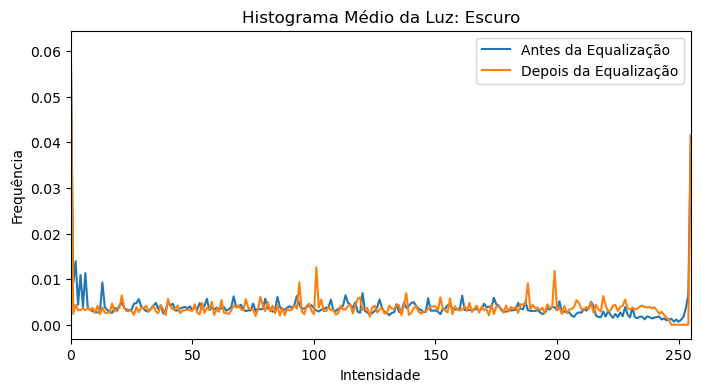

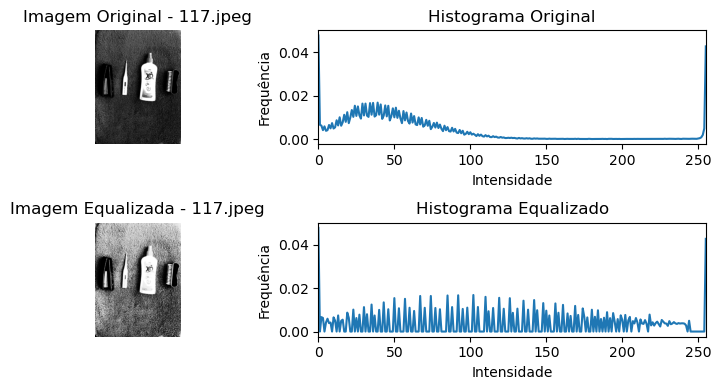

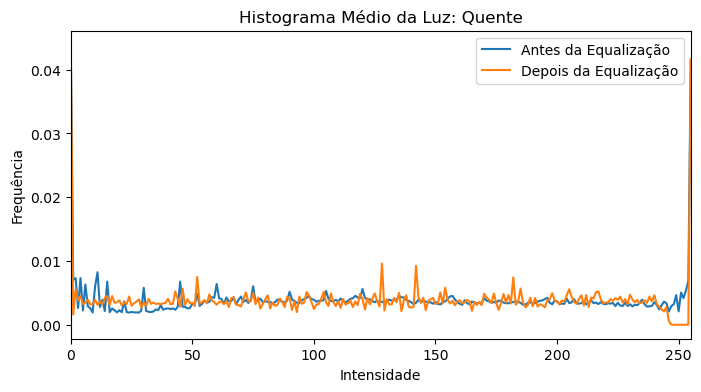

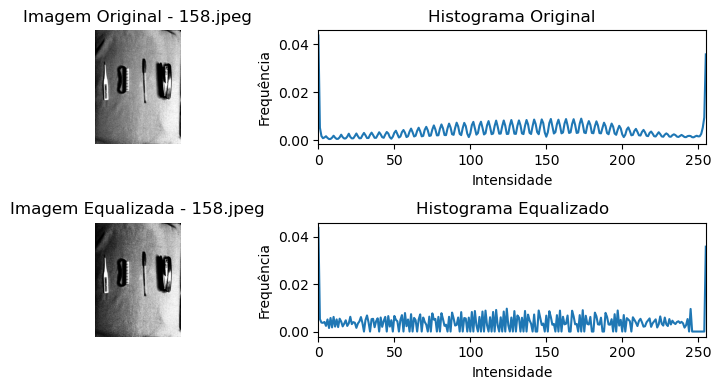

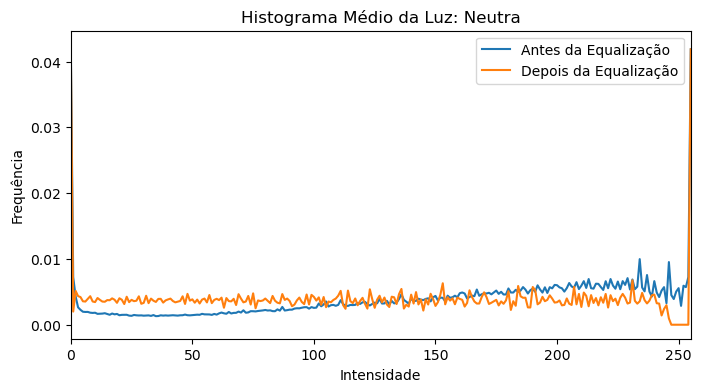

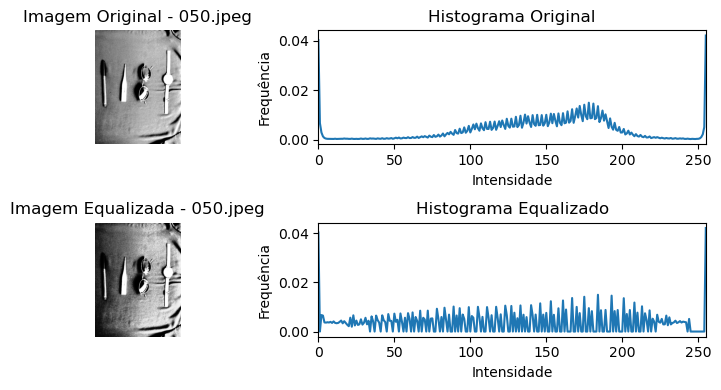

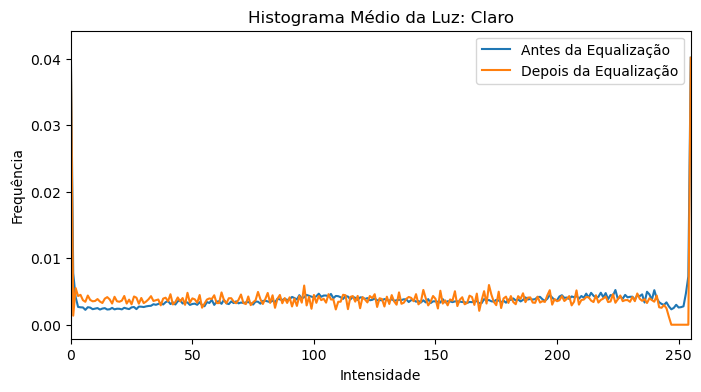

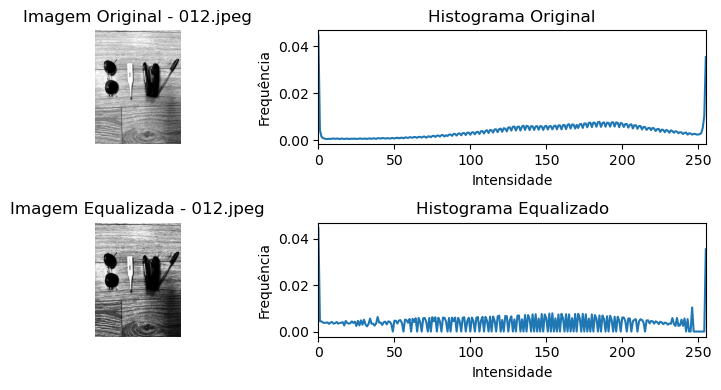

In [38]:
# Caminho para o diretório das imagens em escala de cinza
path = "./augmentedDataset/Contrast_Stretching"

# Listas de imagens por iluminação
"""luz = {
    "Escuro": ['001.jpeg', '004.jpeg', '005.jpeg', '009.jpeg', '010.jpeg', '011.jpeg', '017.jpeg', '024.jpeg', '029.jpeg', '034.jpeg', '038.jpeg', '040.jpeg', '044.jpeg', '045.jpeg', '051.jpeg', '053.jpeg', '054.jpeg', '068.jpeg', '074.jpeg', '079.jpeg', '083.jpeg', '088.jpeg', '093.jpeg', '097.jpeg', '099.jpeg', '100.jpeg', '102.jpeg', '103.jpeg', '106.jpeg', '107.jpeg', '112.jpeg', '113.jpeg', '117.jpeg', '118.jpeg', '123.jpeg', '124.jpeg', '125.jpeg', '128.jpeg', '134.jpeg', '138.jpeg', '149.jpeg', '150.jpeg', '154.jpeg', '157.jpeg', '161.jpeg', '167.jpeg', '173.jpeg', '174.jpeg', '175.jpeg', '182.jpeg', '188.jpeg', '189.jpeg', '190.jpeg', '193.jpeg', '200.jpeg'],
    "Quente": ['002.jpeg', '008.jpeg', '014.jpeg', '018.jpeg', '030.jpeg', '031.jpeg', '035.jpeg', '036.jpeg', '048.jpeg', '049.jpeg', '055.jpeg', '057.jpeg', '058.jpeg', '059.jpeg', '060.jpeg', '064.jpeg', '065.jpeg', '071.jpeg', '077.jpeg', '078.jpeg', '084.jpeg', '089.jpeg', '090.jpeg', '101.jpeg', '104.jpeg', '109.jpeg', '111.jpeg', '114.jpeg', '116.jpeg', '120.jpeg', '129.jpeg', '131.jpeg', '133.jpeg', '135.jpeg', '137.jpeg', '141.jpeg', '144.jpeg', '148.jpeg', '153.jpeg', '158.jpeg', '160.jpeg', '164.jpeg', '165.jpeg', '177.jpeg', '179.jpeg', '184.jpeg', '185.jpeg', '194.jpeg', '195.jpeg', '196.jpeg'],
    "Neutra": ['003.jpeg', '013.jpeg', '015.jpeg', '016.jpeg', '022.jpeg', '023.jpeg', '026.jpeg', '028.jpeg', '032.jpeg', '033.jpeg', '041.jpeg', '042.jpeg', '043.jpeg', '047.jpeg', '050.jpeg', '056.jpeg', '061.jpeg', '062.jpeg', '063.jpeg', '066.jpeg', '069.jpeg', '072.jpeg', '073.jpeg', '075.jpeg', '076.jpeg', '081.jpeg', '085.jpeg', '086.jpeg', '091.jpeg', '092.jpeg', '095.jpeg', '096.jpeg', '115.jpeg', '119.jpeg', '122.jpeg', '127.jpeg', '130.jpeg', '132.jpeg', '136.jpeg', '139.jpeg', '143.jpeg', '147.jpeg', '151.jpeg', '156.jpeg', '166.jpeg', '192.jpeg', '197.jpeg'],
    "Claro": ['006.jpeg', '007.jpeg', '012.jpeg', '019.jpeg', '020.jpeg', '021.jpeg', '025.jpeg', '027.jpeg', '037.jpeg', '039.jpeg', '046.jpeg', '052.jpeg', '067.jpeg', '070.jpeg', '080.jpeg', '082.jpeg', '087.jpeg', '094.jpeg', '098.jpeg', '105.jpeg', '108.jpeg', '110.jpeg', '121.jpeg', '126.jpeg', '140.jpeg', '142.jpeg', '145.jpeg', '146.jpeg', '152.jpeg', '155.jpeg', '159.jpeg', '162.jpeg', '163.jpeg', '168.jpeg', '169.jpeg', '170.jpeg', '171.jpeg', '172.jpeg', '176.jpeg', '178.jpeg', '180.jpeg', '181.jpeg', '183.jpeg', '186.jpeg', '187.jpeg', '191.jpeg', '198.jpeg', '199.jpeg']
}"""

def calculate_average_histogram(image_paths, path, equalize=False):
    # Inicializa o histograma médio
    average_histogram = np.zeros(256)

    for image_name in image_paths:
        # Carrega a imagem
        image = cv2.imread(os.path.join(path, image_name), cv2.IMREAD_GRAYSCALE)
        if image is None:
            print(f"Erro ao carregar a imagem: {image_name}")
            continue
        
        if equalize:
            # Aplica equalização de histograma
            image = cv2.equalizeHist(image)
        
        # Calcula o histograma da imagem
        hist = cv2.calcHist([image], [0], None, [256], [0, 256])
        hist = hist / hist.sum()  # Normaliza o histograma
        average_histogram += hist.flatten()

    # Divide pelo número de imagens para obter a média
    average_histogram /= len(image_paths)
    return average_histogram

def plot_histograms_and_images(luz_name, image_name, image, image_eq, hist_orig, hist_eq):
    # Plota as imagens e os histogramas
    plt.figure(figsize=(8, 4))
    
    # Imagem original
    plt.subplot(2, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title(f'Imagem Original - {image_name}')
    plt.axis('off')

    # Histograma da imagem original
    plt.subplot(2, 2, 2)
    plt.plot(hist_orig)
    plt.title('Histograma Original')
    plt.xlabel('Intensidade')
    plt.ylabel('Frequência')
    plt.xlim([0, 255])
    
    # Imagem equalizada
    plt.subplot(2, 2, 3)
    plt.imshow(image_eq, cmap='gray')
    plt.title(f'Imagem Equalizada - {image_name}')
    plt.axis('off')

    # Histograma da imagem equalizada
    plt.subplot(2, 2, 4)
    plt.plot(hist_eq)
    plt.title('Histograma Equalizado')
    plt.xlabel('Intensidade')
    plt.ylabel('Frequência')
    plt.xlim([0, 255])
    
    plt.tight_layout()
    plt.show()

def plot_luz_histograms_and_images():
    for luz_name, image_list in luz.items():
        # Calcula o histograma médio para as imagens da luz antes da equalização
        avg_hist_before = calculate_average_histogram(image_list, path, equalize=False)
        
        # Calcula o histograma médio para as imagens da luz após a equalização
        avg_hist_after = calculate_average_histogram(image_list, path, equalize=True)
        
        # Plota os histogramas médios antes e depois da equalização
        plt.figure(figsize=(8, 4))
        plt.plot(avg_hist_before, label='Antes da Equalização')
        plt.plot(avg_hist_after, label='Depois da Equalização')
        plt.title(f'Histograma Médio da Luz: {luz_name}')
        plt.xlabel('Intensidade')
        plt.ylabel('Frequência')
        plt.legend()
        plt.xlim([0, 255])
        plt.show()
        
        # Seleciona uma imagem aleatória da luz
        random_image = random.choice(image_list)
        
        # Carrega a imagem
        image_path = os.path.join(path, random_image)
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if image is None:
            print(f"Erro ao carregar a imagem: {random_image}")
            continue

        # Aplica equalização de histograma
        image_eq = cv2.equalizeHist(image)

        # Calcula os histogramas
        hist_orig = cv2.calcHist([image], [0], None, [256], [0, 256]).flatten()
        hist_eq = cv2.calcHist([image_eq], [0], None, [256], [0, 256]).flatten()

        # Normaliza os histogramas
        hist_orig = hist_orig / hist_orig.sum()
        hist_eq = hist_eq / hist_eq.sum()

        # Plota a imagem original e a imagem equalizada com seus respectivos histogramas
        plot_histograms_and_images(luz_name, random_image, image, image_eq, hist_orig, hist_eq)

# Plota o histograma médio das imagens para cada luz e imagens antes e depois da equalização
plot_luz_histograms_and_images()

# Laplacian (normalization)

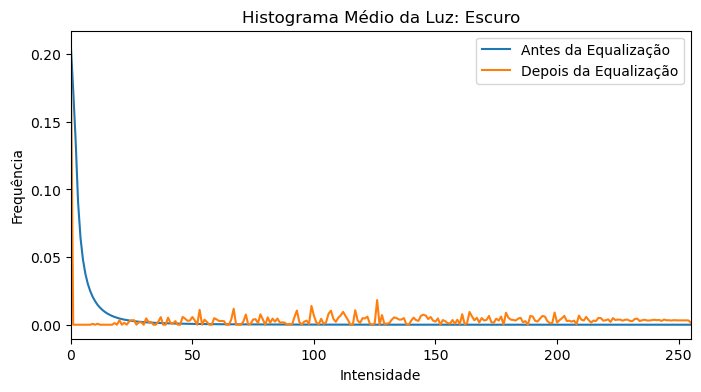

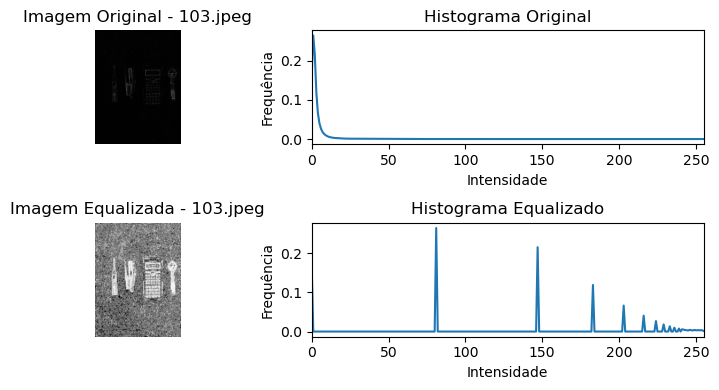

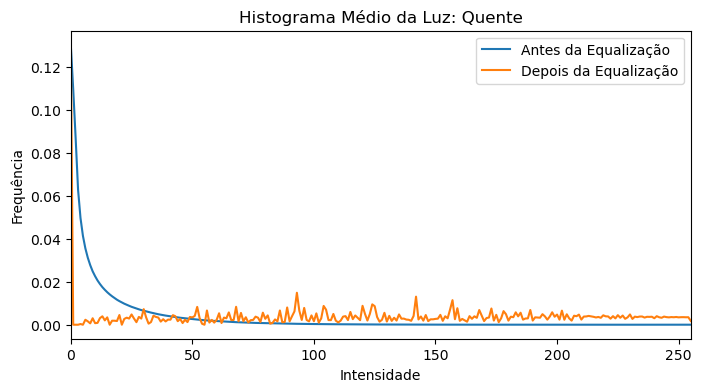

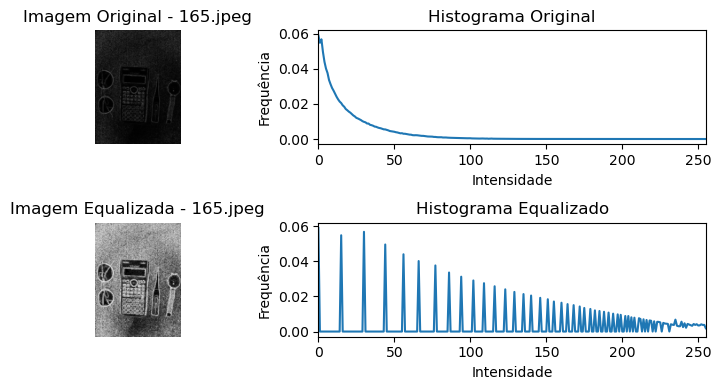

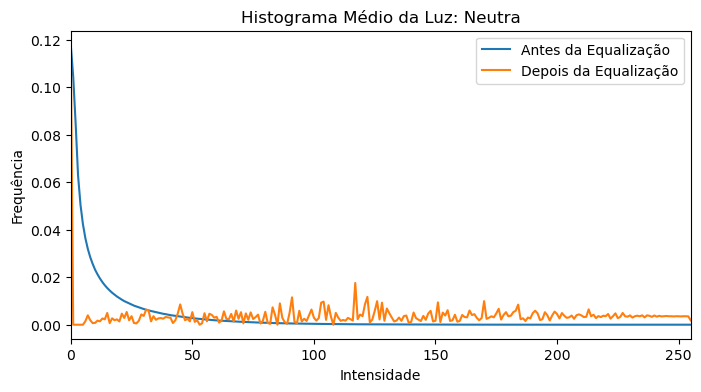

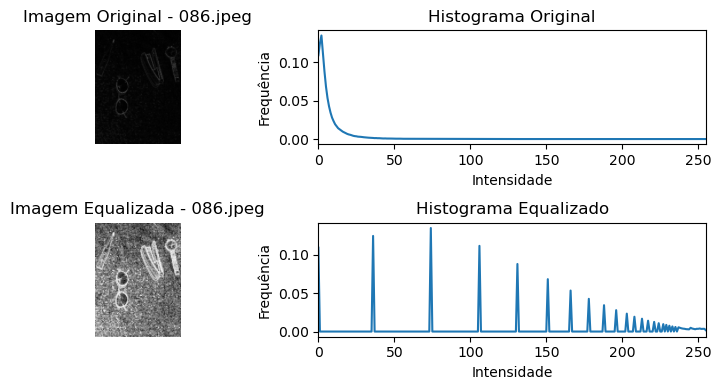

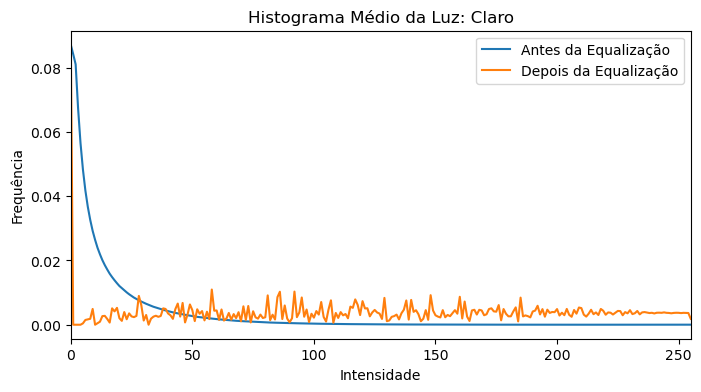

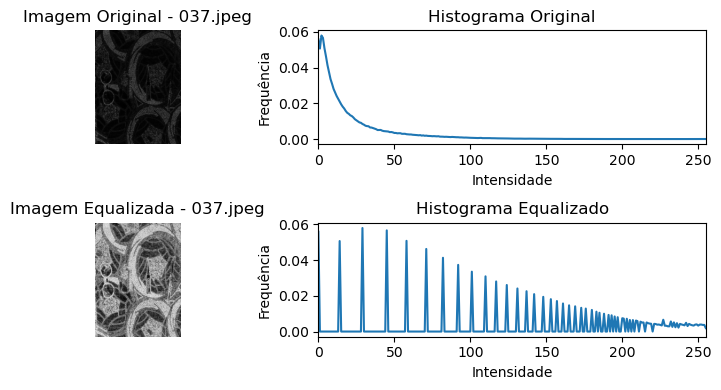

In [39]:
# Caminho para o diretório das imagens em escala de cinza
path = "./augmentedDataset/Laplaciano"

# Listas de imagens por iluminação
"""luz = {
    "Escuro": ['001.jpeg', '004.jpeg', '005.jpeg', '009.jpeg', '010.jpeg', '011.jpeg', '017.jpeg', '024.jpeg', '029.jpeg', '034.jpeg', '038.jpeg', '040.jpeg', '044.jpeg', '045.jpeg', '051.jpeg', '053.jpeg', '054.jpeg', '068.jpeg', '074.jpeg', '079.jpeg', '083.jpeg', '088.jpeg', '093.jpeg', '097.jpeg', '099.jpeg', '100.jpeg', '102.jpeg', '103.jpeg', '106.jpeg', '107.jpeg', '112.jpeg', '113.jpeg', '117.jpeg', '118.jpeg', '123.jpeg', '124.jpeg', '125.jpeg', '128.jpeg', '134.jpeg', '138.jpeg', '149.jpeg', '150.jpeg', '154.jpeg', '157.jpeg', '161.jpeg', '167.jpeg', '173.jpeg', '174.jpeg', '175.jpeg', '182.jpeg', '188.jpeg', '189.jpeg', '190.jpeg', '193.jpeg', '200.jpeg'],
    "Quente": ['002.jpeg', '008.jpeg', '014.jpeg', '018.jpeg', '030.jpeg', '031.jpeg', '035.jpeg', '036.jpeg', '048.jpeg', '049.jpeg', '055.jpeg', '057.jpeg', '058.jpeg', '059.jpeg', '060.jpeg', '064.jpeg', '065.jpeg', '071.jpeg', '077.jpeg', '078.jpeg', '084.jpeg', '089.jpeg', '090.jpeg', '101.jpeg', '104.jpeg', '109.jpeg', '111.jpeg', '114.jpeg', '116.jpeg', '120.jpeg', '129.jpeg', '131.jpeg', '133.jpeg', '135.jpeg', '137.jpeg', '141.jpeg', '144.jpeg', '148.jpeg', '153.jpeg', '158.jpeg', '160.jpeg', '164.jpeg', '165.jpeg', '177.jpeg', '179.jpeg', '184.jpeg', '185.jpeg', '194.jpeg', '195.jpeg', '196.jpeg'],
    "Neutra": ['003.jpeg', '013.jpeg', '015.jpeg', '016.jpeg', '022.jpeg', '023.jpeg', '026.jpeg', '028.jpeg', '032.jpeg', '033.jpeg', '041.jpeg', '042.jpeg', '043.jpeg', '047.jpeg', '050.jpeg', '056.jpeg', '061.jpeg', '062.jpeg', '063.jpeg', '066.jpeg', '069.jpeg', '072.jpeg', '073.jpeg', '075.jpeg', '076.jpeg', '081.jpeg', '085.jpeg', '086.jpeg', '091.jpeg', '092.jpeg', '095.jpeg', '096.jpeg', '115.jpeg', '119.jpeg', '122.jpeg', '127.jpeg', '130.jpeg', '132.jpeg', '136.jpeg', '139.jpeg', '143.jpeg', '147.jpeg', '151.jpeg', '156.jpeg', '166.jpeg', '192.jpeg', '197.jpeg'],
    "Claro": ['006.jpeg', '007.jpeg', '012.jpeg', '019.jpeg', '020.jpeg', '021.jpeg', '025.jpeg', '027.jpeg', '037.jpeg', '039.jpeg', '046.jpeg', '052.jpeg', '067.jpeg', '070.jpeg', '080.jpeg', '082.jpeg', '087.jpeg', '094.jpeg', '098.jpeg', '105.jpeg', '108.jpeg', '110.jpeg', '121.jpeg', '126.jpeg', '140.jpeg', '142.jpeg', '145.jpeg', '146.jpeg', '152.jpeg', '155.jpeg', '159.jpeg', '162.jpeg', '163.jpeg', '168.jpeg', '169.jpeg', '170.jpeg', '171.jpeg', '172.jpeg', '176.jpeg', '178.jpeg', '180.jpeg', '181.jpeg', '183.jpeg', '186.jpeg', '187.jpeg', '191.jpeg', '198.jpeg', '199.jpeg']
}"""

def calculate_average_histogram(image_paths, path, equalize=False):
    # Inicializa o histograma médio
    average_histogram = np.zeros(256)

    for image_name in image_paths:
        # Carrega a imagem
        image = cv2.imread(os.path.join(path, image_name), cv2.IMREAD_GRAYSCALE)
        if image is None:
            print(f"Erro ao carregar a imagem: {image_name}")
            continue
        
        if equalize:
            # Aplica equalização de histograma
            image = cv2.equalizeHist(image)
        
        # Calcula o histograma da imagem
        hist = cv2.calcHist([image], [0], None, [256], [0, 256])
        hist = hist / hist.sum()  # Normaliza o histograma
        average_histogram += hist.flatten()

    # Divide pelo número de imagens para obter a média
    average_histogram /= len(image_paths)
    return average_histogram

def plot_histograms_and_images(luz_name, image_name, image, image_eq, hist_orig, hist_eq):
    # Plota as imagens e os histogramas
    plt.figure(figsize=(8, 4))
    
    # Imagem original
    plt.subplot(2, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title(f'Imagem Original - {image_name}')
    plt.axis('off')

    # Histograma da imagem original
    plt.subplot(2, 2, 2)
    plt.plot(hist_orig)
    plt.title('Histograma Original')
    plt.xlabel('Intensidade')
    plt.ylabel('Frequência')
    plt.xlim([0, 255])
    
    # Imagem equalizada
    plt.subplot(2, 2, 3)
    plt.imshow(image_eq, cmap='gray')
    plt.title(f'Imagem Equalizada - {image_name}')
    plt.axis('off')

    # Histograma da imagem equalizada
    plt.subplot(2, 2, 4)
    plt.plot(hist_eq)
    plt.title('Histograma Equalizado')
    plt.xlabel('Intensidade')
    plt.ylabel('Frequência')
    plt.xlim([0, 255])
    
    plt.tight_layout()
    plt.show()

def plot_luz_histograms_and_images():
    for luz_name, image_list in luz.items():
        # Calcula o histograma médio para as imagens da luz antes da equalização
        avg_hist_before = calculate_average_histogram(image_list, path, equalize=False)
        
        # Calcula o histograma médio para as imagens da luz após a equalização
        avg_hist_after = calculate_average_histogram(image_list, path, equalize=True)
        
        # Plota os histogramas médios antes e depois da equalização
        plt.figure(figsize=(8, 4))
        plt.plot(avg_hist_before, label='Antes da Equalização')
        plt.plot(avg_hist_after, label='Depois da Equalização')
        plt.title(f'Histograma Médio da Luz: {luz_name}')
        plt.xlabel('Intensidade')
        plt.ylabel('Frequência')
        plt.legend()
        plt.xlim([0, 255])
        plt.show()
        
        # Seleciona uma imagem aleatória da luz
        random_image = random.choice(image_list)
        
        # Carrega a imagem
        image_path = os.path.join(path, random_image)
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if image is None:
            print(f"Erro ao carregar a imagem: {random_image}")
            continue

        # Aplica equalização de histograma
        image_eq = cv2.equalizeHist(image)

        # Calcula os histogramas
        hist_orig = cv2.calcHist([image], [0], None, [256], [0, 256]).flatten()
        hist_eq = cv2.calcHist([image_eq], [0], None, [256], [0, 256]).flatten()

        # Normaliza os histogramas
        hist_orig = hist_orig / hist_orig.sum()
        hist_eq = hist_eq / hist_eq.sum()

        # Plota a imagem original e a imagem equalizada com seus respectivos histogramas
        plot_histograms_and_images(luz_name, random_image, image, image_eq, hist_orig, hist_eq)

# Plota o histograma médio das imagens para cada luz e imagens antes e depois da equalização
plot_luz_histograms_and_images()

# Exponential transformation (normalization)

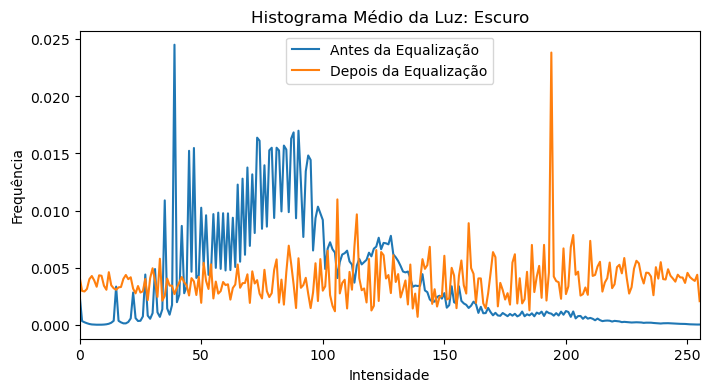

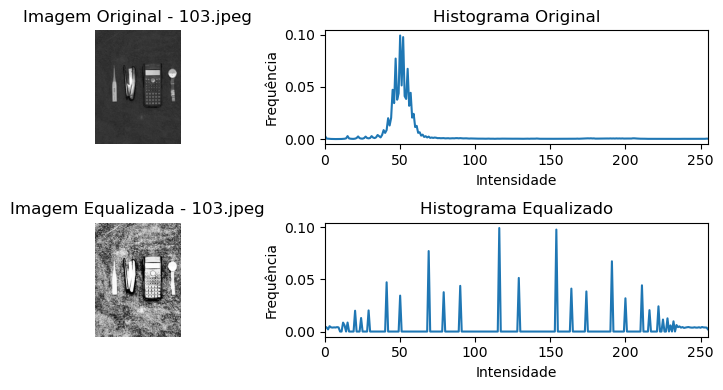

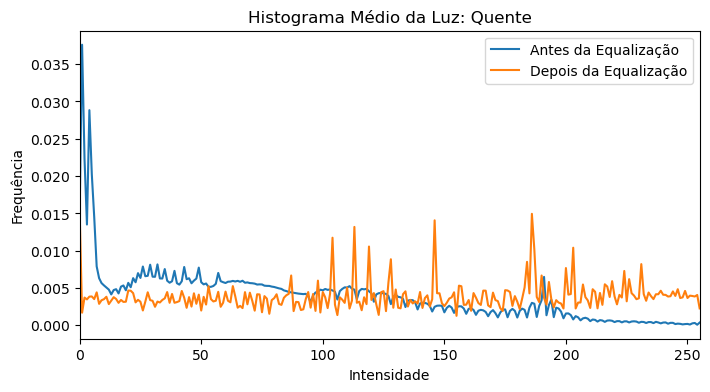

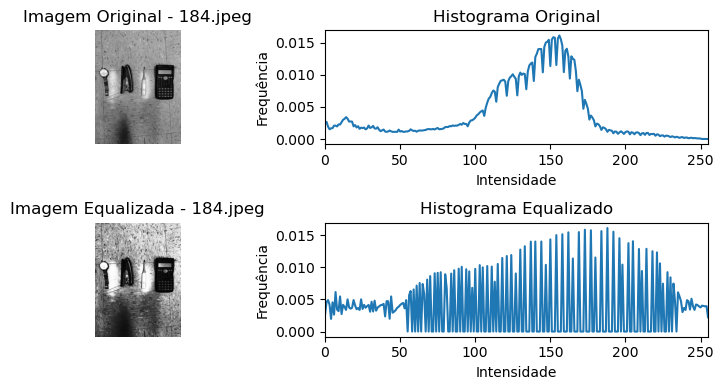

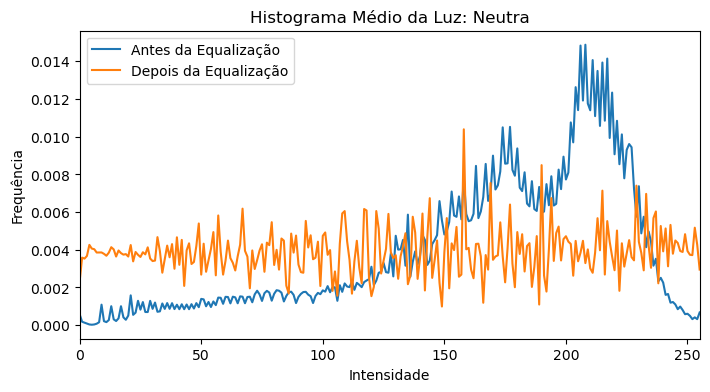

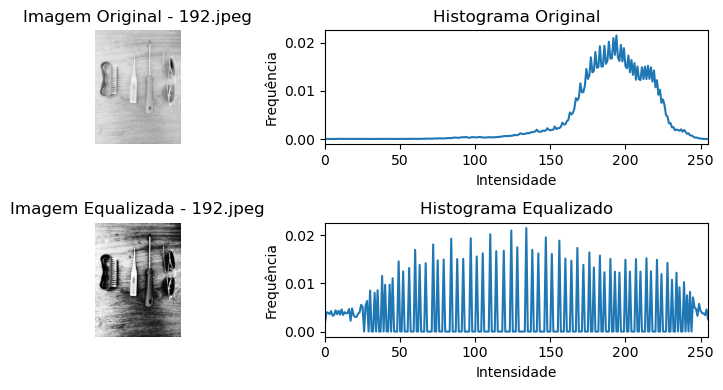

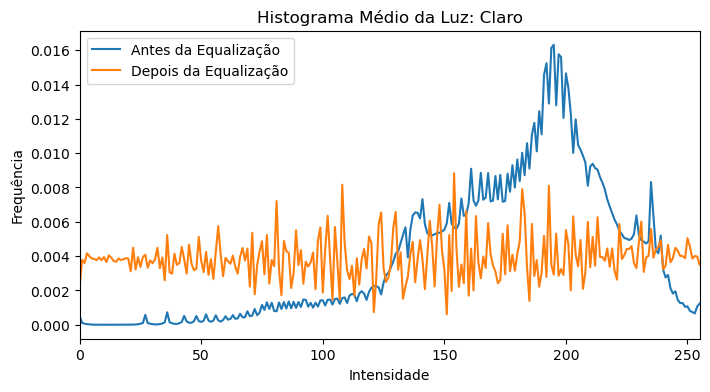

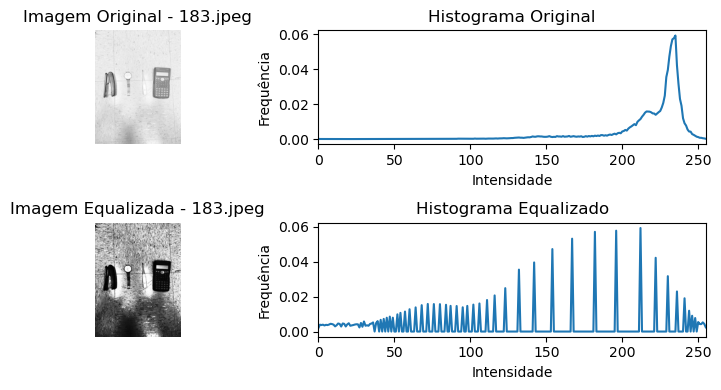

In [40]:
# Caminho para o diretório das imagens em escala de cinza
path = "./augmentedDataset/Exponencial_da_imagem"

# Listas de imagens por iluminação
"""luz = {
    "Escuro": ['001.jpeg', '004.jpeg', '005.jpeg', '009.jpeg', '010.jpeg', '011.jpeg', '017.jpeg', '024.jpeg', '029.jpeg', '034.jpeg', '038.jpeg', '040.jpeg', '044.jpeg', '045.jpeg', '051.jpeg', '053.jpeg', '054.jpeg', '068.jpeg', '074.jpeg', '079.jpeg', '083.jpeg', '088.jpeg', '093.jpeg', '097.jpeg', '099.jpeg', '100.jpeg', '102.jpeg', '103.jpeg', '106.jpeg', '107.jpeg', '112.jpeg', '113.jpeg', '117.jpeg', '118.jpeg', '123.jpeg', '124.jpeg', '125.jpeg', '128.jpeg', '134.jpeg', '138.jpeg', '149.jpeg', '150.jpeg', '154.jpeg', '157.jpeg', '161.jpeg', '167.jpeg', '173.jpeg', '174.jpeg', '175.jpeg', '182.jpeg', '188.jpeg', '189.jpeg', '190.jpeg', '193.jpeg', '200.jpeg'],
    "Quente": ['002.jpeg', '008.jpeg', '014.jpeg', '018.jpeg', '030.jpeg', '031.jpeg', '035.jpeg', '036.jpeg', '048.jpeg', '049.jpeg', '055.jpeg', '057.jpeg', '058.jpeg', '059.jpeg', '060.jpeg', '064.jpeg', '065.jpeg', '071.jpeg', '077.jpeg', '078.jpeg', '084.jpeg', '089.jpeg', '090.jpeg', '101.jpeg', '104.jpeg', '109.jpeg', '111.jpeg', '114.jpeg', '116.jpeg', '120.jpeg', '129.jpeg', '131.jpeg', '133.jpeg', '135.jpeg', '137.jpeg', '141.jpeg', '144.jpeg', '148.jpeg', '153.jpeg', '158.jpeg', '160.jpeg', '164.jpeg', '165.jpeg', '177.jpeg', '179.jpeg', '184.jpeg', '185.jpeg', '194.jpeg', '195.jpeg', '196.jpeg'],
    "Neutra": ['003.jpeg', '013.jpeg', '015.jpeg', '016.jpeg', '022.jpeg', '023.jpeg', '026.jpeg', '028.jpeg', '032.jpeg', '033.jpeg', '041.jpeg', '042.jpeg', '043.jpeg', '047.jpeg', '050.jpeg', '056.jpeg', '061.jpeg', '062.jpeg', '063.jpeg', '066.jpeg', '069.jpeg', '072.jpeg', '073.jpeg', '075.jpeg', '076.jpeg', '081.jpeg', '085.jpeg', '086.jpeg', '091.jpeg', '092.jpeg', '095.jpeg', '096.jpeg', '115.jpeg', '119.jpeg', '122.jpeg', '127.jpeg', '130.jpeg', '132.jpeg', '136.jpeg', '139.jpeg', '143.jpeg', '147.jpeg', '151.jpeg', '156.jpeg', '166.jpeg', '192.jpeg', '197.jpeg'],
    "Claro": ['006.jpeg', '007.jpeg', '012.jpeg', '019.jpeg', '020.jpeg', '021.jpeg', '025.jpeg', '027.jpeg', '037.jpeg', '039.jpeg', '046.jpeg', '052.jpeg', '067.jpeg', '070.jpeg', '080.jpeg', '082.jpeg', '087.jpeg', '094.jpeg', '098.jpeg', '105.jpeg', '108.jpeg', '110.jpeg', '121.jpeg', '126.jpeg', '140.jpeg', '142.jpeg', '145.jpeg', '146.jpeg', '152.jpeg', '155.jpeg', '159.jpeg', '162.jpeg', '163.jpeg', '168.jpeg', '169.jpeg', '170.jpeg', '171.jpeg', '172.jpeg', '176.jpeg', '178.jpeg', '180.jpeg', '181.jpeg', '183.jpeg', '186.jpeg', '187.jpeg', '191.jpeg', '198.jpeg', '199.jpeg']
}"""

def calculate_average_histogram(image_paths, path, equalize=False):
    # Inicializa o histograma médio
    average_histogram = np.zeros(256)

    for image_name in image_paths:
        # Carrega a imagem
        image = cv2.imread(os.path.join(path, image_name), cv2.IMREAD_GRAYSCALE)
        if image is None:
            print(f"Erro ao carregar a imagem: {image_name}")
            continue
        
        if equalize:
            # Aplica equalização de histograma
            image = cv2.equalizeHist(image)
        
        # Calcula o histograma da imagem
        hist = cv2.calcHist([image], [0], None, [256], [0, 256])
        hist = hist / hist.sum()  # Normaliza o histograma
        average_histogram += hist.flatten()

    # Divide pelo número de imagens para obter a média
    average_histogram /= len(image_paths)
    return average_histogram

def plot_histograms_and_images(luz_name, image_name, image, image_eq, hist_orig, hist_eq):
    # Plota as imagens e os histogramas
    plt.figure(figsize=(8, 4))
    
    # Imagem original
    plt.subplot(2, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title(f'Imagem Original - {image_name}')
    plt.axis('off')

    # Histograma da imagem original
    plt.subplot(2, 2, 2)
    plt.plot(hist_orig)
    plt.title('Histograma Original')
    plt.xlabel('Intensidade')
    plt.ylabel('Frequência')
    plt.xlim([0, 255])
    
    # Imagem equalizada
    plt.subplot(2, 2, 3)
    plt.imshow(image_eq, cmap='gray')
    plt.title(f'Imagem Equalizada - {image_name}')
    plt.axis('off')

    # Histograma da imagem equalizada
    plt.subplot(2, 2, 4)
    plt.plot(hist_eq)
    plt.title('Histograma Equalizado')
    plt.xlabel('Intensidade')
    plt.ylabel('Frequência')
    plt.xlim([0, 255])
    
    plt.tight_layout()
    plt.show()

def plot_luz_histograms_and_images():
    for luz_name, image_list in luz.items():
        # Calcula o histograma médio para as imagens da luz antes da equalização
        avg_hist_before = calculate_average_histogram(image_list, path, equalize=False)
        
        # Calcula o histograma médio para as imagens da luz após a equalização
        avg_hist_after = calculate_average_histogram(image_list, path, equalize=True)
        
        # Plota os histogramas médios antes e depois da equalização
        plt.figure(figsize=(8, 4))
        plt.plot(avg_hist_before, label='Antes da Equalização')
        plt.plot(avg_hist_after, label='Depois da Equalização')
        plt.title(f'Histograma Médio da Luz: {luz_name}')
        plt.xlabel('Intensidade')
        plt.ylabel('Frequência')
        plt.legend()
        plt.xlim([0, 255])
        plt.show()
        
        # Seleciona uma imagem aleatória da luz
        random_image = random.choice(image_list)
        
        # Carrega a imagem
        image_path = os.path.join(path, random_image)
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if image is None:
            print(f"Erro ao carregar a imagem: {random_image}")
            continue

        # Aplica equalização de histograma
        image_eq = cv2.equalizeHist(image)

        # Calcula os histogramas
        hist_orig = cv2.calcHist([image], [0], None, [256], [0, 256]).flatten()
        hist_eq = cv2.calcHist([image_eq], [0], None, [256], [0, 256]).flatten()

        # Normaliza os histogramas
        hist_orig = hist_orig / hist_orig.sum()
        hist_eq = hist_eq / hist_eq.sum()

        # Plota a imagem original e a imagem equalizada com seus respectivos histogramas
        plot_histograms_and_images(luz_name, random_image, image, image_eq, hist_orig, hist_eq)

# Plota o histograma médio das imagens para cada luz e imagens antes e depois da equalização
plot_luz_histograms_and_images()

# logarithmic (normalization)

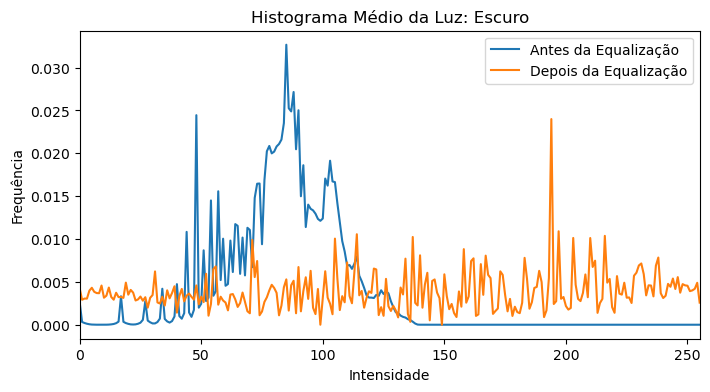

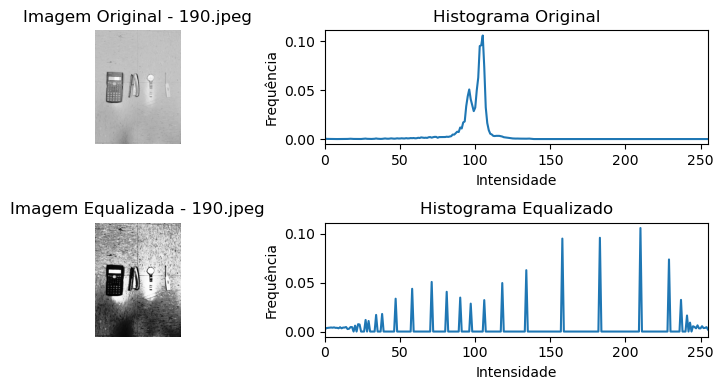

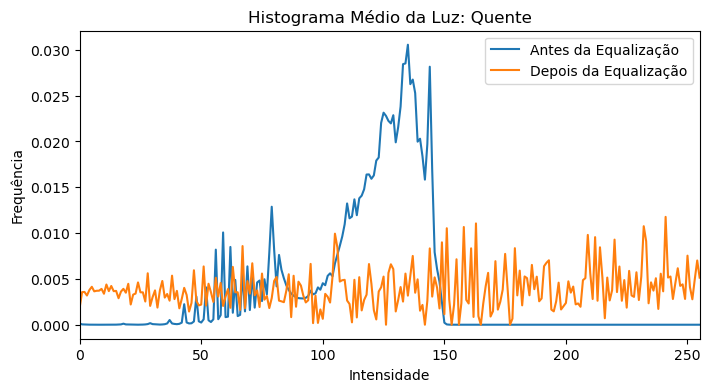

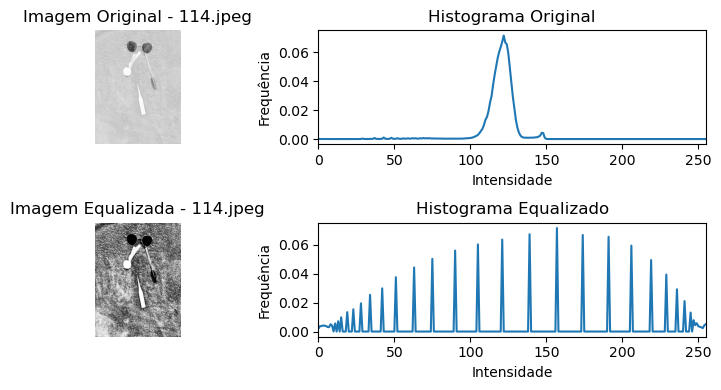

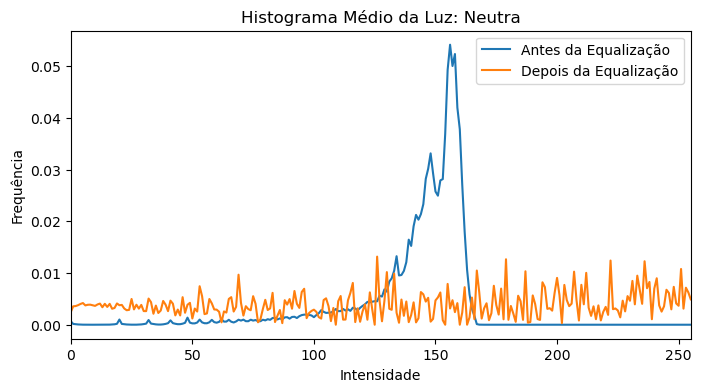

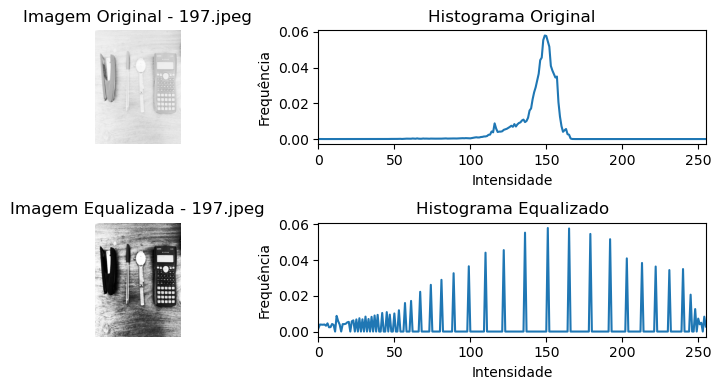

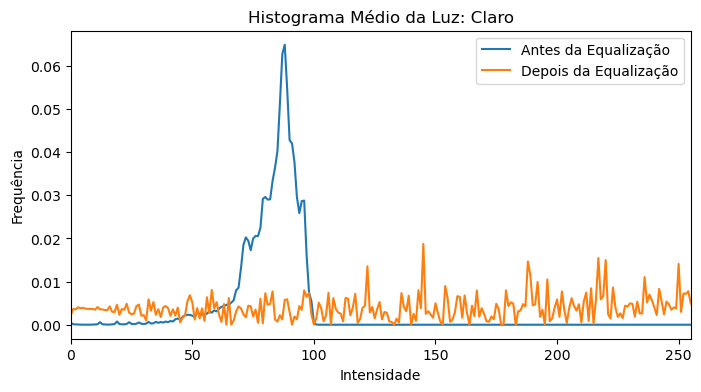

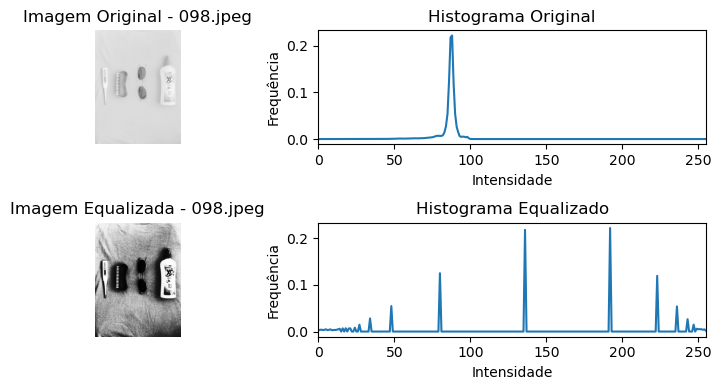

In [34]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

# Caminho para o diretório das imagens em escala de cinza
path = "./augmentedDataset/Logaritmo"

# Listas de imagens por iluminação
luz = {
    "Escuro": ['001.jpeg', '004.jpeg', '005.jpeg', '009.jpeg', '010.jpeg', '011.jpeg', '017.jpeg', '024.jpeg', '029.jpeg', '034.jpeg', '038.jpeg', '040.jpeg', '044.jpeg', '045.jpeg', '051.jpeg', '053.jpeg', '054.jpeg', '068.jpeg', '074.jpeg', '079.jpeg', '083.jpeg', '088.jpeg', '093.jpeg', '097.jpeg', '099.jpeg', '100.jpeg', '102.jpeg', '103.jpeg', '106.jpeg', '107.jpeg', '112.jpeg', '113.jpeg', '117.jpeg', '118.jpeg', '123.jpeg', '124.jpeg', '125.jpeg', '128.jpeg', '134.jpeg', '138.jpeg', '149.jpeg', '150.jpeg', '154.jpeg', '157.jpeg', '161.jpeg', '167.jpeg', '173.jpeg', '174.jpeg', '175.jpeg', '182.jpeg', '188.jpeg', '189.jpeg', '190.jpeg', '193.jpeg', '200.jpeg'],
    "Quente": ['002.jpeg', '008.jpeg', '014.jpeg', '018.jpeg', '030.jpeg', '031.jpeg', '035.jpeg', '036.jpeg', '048.jpeg', '049.jpeg', '055.jpeg', '057.jpeg', '058.jpeg', '059.jpeg', '060.jpeg', '064.jpeg', '065.jpeg', '071.jpeg', '077.jpeg', '078.jpeg', '084.jpeg', '089.jpeg', '090.jpeg', '101.jpeg', '104.jpeg', '109.jpeg', '111.jpeg', '114.jpeg', '116.jpeg', '120.jpeg', '129.jpeg', '131.jpeg', '133.jpeg', '135.jpeg', '137.jpeg', '141.jpeg', '144.jpeg', '148.jpeg', '153.jpeg', '158.jpeg', '160.jpeg', '164.jpeg', '165.jpeg', '177.jpeg', '179.jpeg', '184.jpeg', '185.jpeg', '194.jpeg', '195.jpeg', '196.jpeg'],
    "Neutra": ['003.jpeg', '013.jpeg', '015.jpeg', '016.jpeg', '022.jpeg', '023.jpeg', '026.jpeg', '028.jpeg', '032.jpeg', '033.jpeg', '041.jpeg', '042.jpeg', '043.jpeg', '047.jpeg', '050.jpeg', '056.jpeg', '061.jpeg', '062.jpeg', '063.jpeg', '066.jpeg', '069.jpeg', '072.jpeg', '073.jpeg', '075.jpeg', '076.jpeg', '081.jpeg', '085.jpeg', '086.jpeg', '091.jpeg', '092.jpeg', '095.jpeg', '096.jpeg', '115.jpeg', '119.jpeg', '122.jpeg', '127.jpeg', '130.jpeg', '132.jpeg', '136.jpeg', '139.jpeg', '143.jpeg', '147.jpeg', '151.jpeg', '156.jpeg', '166.jpeg', '192.jpeg', '197.jpeg'],
    "Claro": ['006.jpeg', '007.jpeg', '012.jpeg', '019.jpeg', '020.jpeg', '021.jpeg', '025.jpeg', '027.jpeg', '037.jpeg', '039.jpeg', '046.jpeg', '052.jpeg', '067.jpeg', '070.jpeg', '080.jpeg', '082.jpeg', '087.jpeg', '094.jpeg', '098.jpeg', '105.jpeg', '108.jpeg', '110.jpeg', '121.jpeg', '126.jpeg', '140.jpeg', '142.jpeg', '145.jpeg', '146.jpeg', '152.jpeg', '155.jpeg', '159.jpeg', '162.jpeg', '163.jpeg', '168.jpeg', '169.jpeg', '170.jpeg', '171.jpeg', '172.jpeg', '176.jpeg', '178.jpeg', '180.jpeg', '181.jpeg', '183.jpeg', '186.jpeg', '187.jpeg', '191.jpeg', '198.jpeg', '199.jpeg']
}

def calculate_average_histogram(image_paths, path, equalize=False):
    # Inicializa o histograma médio
    average_histogram = np.zeros(256)

    for image_name in image_paths:
        # Carrega a imagem
        image = cv2.imread(os.path.join(path, image_name), cv2.IMREAD_GRAYSCALE)
        if image is None:
            print(f"Erro ao carregar a imagem: {image_name}")
            continue
        
        if equalize:
            # Aplica equalização de histograma
            image = cv2.equalizeHist(image)
        
        # Calcula o histograma da imagem
        hist = cv2.calcHist([image], [0], None, [256], [0, 256])
        hist = hist / hist.sum()  # Normaliza o histograma
        average_histogram += hist.flatten()

    # Divide pelo número de imagens para obter a média
    average_histogram /= len(image_paths)
    return average_histogram

def plot_histograms_and_images(luz_name, image_name, image, image_eq, hist_orig, hist_eq):
    # Plota as imagens e os histogramas
    plt.figure(figsize=(8, 4))
    
    # Imagem original
    plt.subplot(2, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title(f'Imagem Original - {image_name}')
    plt.axis('off')

    # Histograma da imagem original
    plt.subplot(2, 2, 2)
    plt.plot(hist_orig)
    plt.title('Histograma Original')
    plt.xlabel('Intensidade')
    plt.ylabel('Frequência')
    plt.xlim([0, 255])
    
    # Imagem equalizada
    plt.subplot(2, 2, 3)
    plt.imshow(image_eq, cmap='gray')
    plt.title(f'Imagem Equalizada - {image_name}')
    plt.axis('off')

    # Histograma da imagem equalizada
    plt.subplot(2, 2, 4)
    plt.plot(hist_eq)
    plt.title('Histograma Equalizado')
    plt.xlabel('Intensidade')
    plt.ylabel('Frequência')
    plt.xlim([0, 255])
    
    plt.tight_layout()
    plt.show()

def plot_luz_histograms_and_images():
    for luz_name, image_list in luz.items():
        # Calcula o histograma médio para as imagens da luz antes da equalização
        avg_hist_before = calculate_average_histogram(image_list, path, equalize=False)
        
        # Calcula o histograma médio para as imagens da luz após a equalização
        avg_hist_after = calculate_average_histogram(image_list, path, equalize=True)
        
        # Plota os histogramas médios antes e depois da equalização
        plt.figure(figsize=(8, 4))
        plt.plot(avg_hist_before, label='Antes da Equalização')
        plt.plot(avg_hist_after, label='Depois da Equalização')
        plt.title(f'Histograma Médio da Luz: {luz_name}')
        plt.xlabel('Intensidade')
        plt.ylabel('Frequência')
        plt.legend()
        plt.xlim([0, 255])
        plt.show()
        
        # Seleciona uma imagem aleatória da luz
        random_image = random.choice(image_list)
        
        # Carrega a imagem
        image_path = os.path.join(path, random_image)
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if image is None:
            print(f"Erro ao carregar a imagem: {random_image}")
            continue

        # Aplica equalização de histograma
        image_eq = cv2.equalizeHist(image)

        # Calcula os histogramas
        hist_orig = cv2.calcHist([image], [0], None, [256], [0, 256]).flatten()
        hist_eq = cv2.calcHist([image_eq], [0], None, [256], [0, 256]).flatten()

        # Normaliza os histogramas
        hist_orig = hist_orig / hist_orig.sum()
        hist_eq = hist_eq / hist_eq.sum()

        # Plota a imagem original e a imagem equalizada com seus respectivos histogramas
        plot_histograms_and_images(luz_name, random_image, image, image_eq, hist_orig, hist_eq)

# Plota o histograma médio das imagens para cada luz e imagens antes e depois da equalização
plot_luz_histograms_and_images()

Durante o processo de equalização de histograma, verificou-se que as imagens com iluminação mais escura, presentes tanto no originalGrayDataset quanto no augmentedDataset, apresentaram um desempenho inferior em comparação com as imagens originais. Esse efeito pode ser atribuído à dificuldade da equalização em lidar com baixos níveis de contraste e detalhes em áreas escuras, resultando em uma qualidade de imagem que, muitas vezes, se mostrou pior do que a imagem original.